# Data Drift Detector

Data Drift Detector provides some quick methods to detect data drift. This may be commonly needed to identify if a live machine learning model's performance have dipped due to data drift in the production environment. These methods include calculating the distribution distances, plotting of graphs, and comparing the ML efficacy of the 2 datasets.

This notebook will demonstrate the usage of the data drift detector package.

Let's use the boston dataset for this example, and split it equally into 2 to simulate prior and post datasets.

In [1]:
import json
import pandas as pd
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from data_drift_detector import DataDriftDetector

In [2]:
import sys
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler(sys.stdout))

In [3]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# split the data set
df = shuffle(df)
split_ = int(len(df)/2)
df_prior = df.iloc[:split_]
df_post = df.iloc[split_:]

Initialize the detector

In [5]:
categorical_columns = ["target"]
detector = DataDriftDetector(
    df_prior=df_prior,
    df_post=df_post,
    categorical_columns=["target"],
    numeric_columns=[c for c in df.columns if c not in categorical_columns]
)

`.calculate_drift()` returns a dictionary containing the column name and the corresponding statistics between the respective column in the prior and post dataframe. For each column, the jensen shannon distance and the wasserstein distance is calculated, along with a statistical test for similarity. High distances suggest greater data drift. Low p values suggest a significant difference in distribution.

In [6]:
# calculate jensen shannon distance between each column of the 2 data sets
print(json.dumps(detector.calculate_drift(), indent=4))

{
    "categorical": {
        "target": {
            "chi_square_test_statistic": 2.148033126293996,
            "chi_square_test_p_value": 0.341633565188248,
            "kl_divergence_post_given_prior": 0.014730622687603372,
            "kl_divergence_prior_given_post": 0.01524842206638485,
            "jensen_shannon_distance": 0.061158307909615,
            "wasserstein_distance": 0.01777777777777778
        }
    },
    "numerical": {
        "sepal length (cm)": {
            "ks_2sample_test_statistic": 0.12,
            "ks_2sample_test_p_value": 0.469506448503778,
            "jensen_shannon_distance": 0.037346692432734224,
            "wasserstein_distance": 0.0005360853937788339
        },
        "sepal width (cm)": {
            "ks_2sample_test_statistic": 0.13,
            "ks_2sample_test_p_value": 0.36818778606286096,
            "jensen_shannon_distance": 0.11566460184166831,
            "wasserstein_distance": 0.0015066079214623722
        },
        "petal length 

Let's look at the difference by way of a plot.

Plotting the following numeric column(s): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


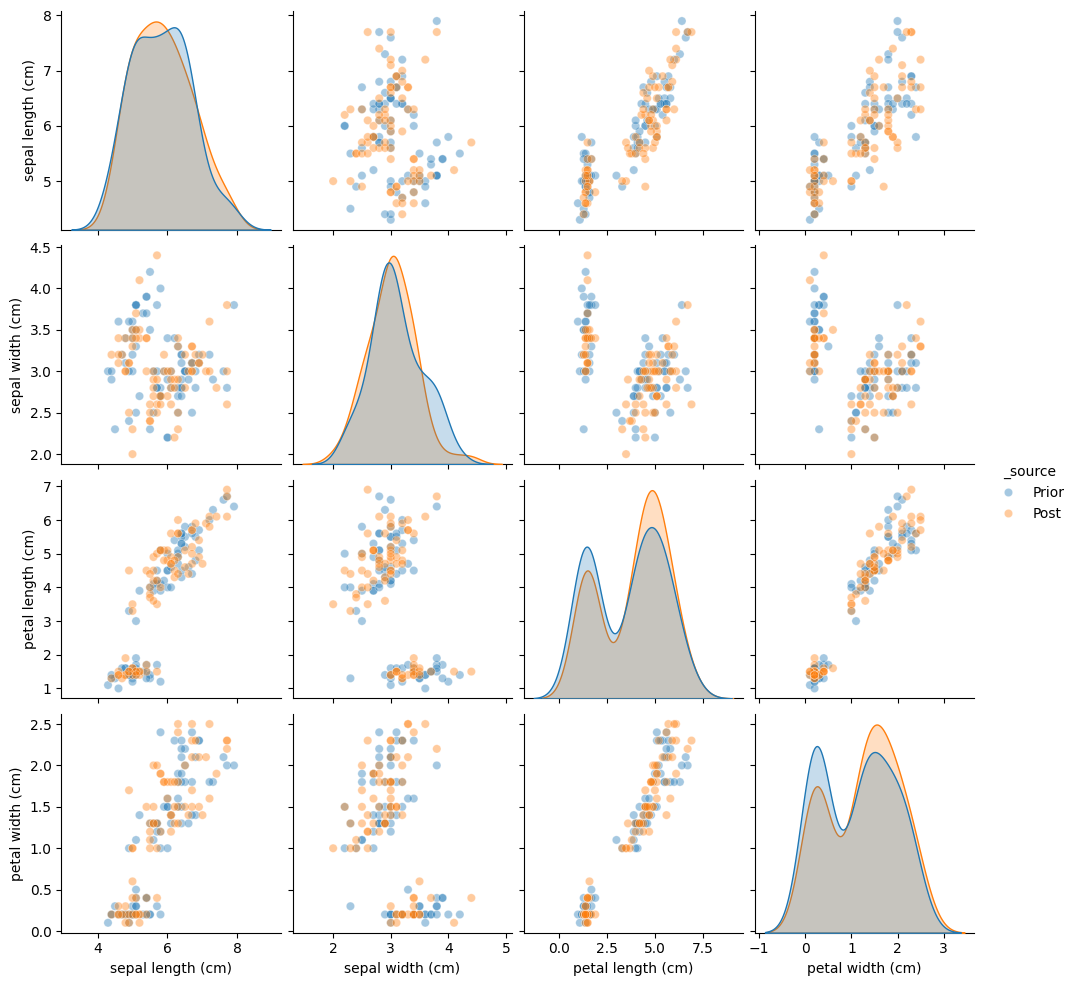

In [7]:
# plot numeric columns against each other in a pair grid
detector.plot_numeric_to_numeric(
    plot_kws={'alpha': 0.4},
    diag_kws={'common_norm': False}
)

We may also explore plots for categorical columns vs numerical columns.

Plotting the following categorical column(s): target
Against the following numeric column(s):sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
Categorical columns with high cardinality (>20 unique values) are not plotted.


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

/Users/kelvin/wd/data-drift-detector/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)
/Users/kelvin/wd/data-drift-detector/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)
/Users/kelvin/wd/data-drift-detector/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


/Users/kelvin/wd/data-drift-detector/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)


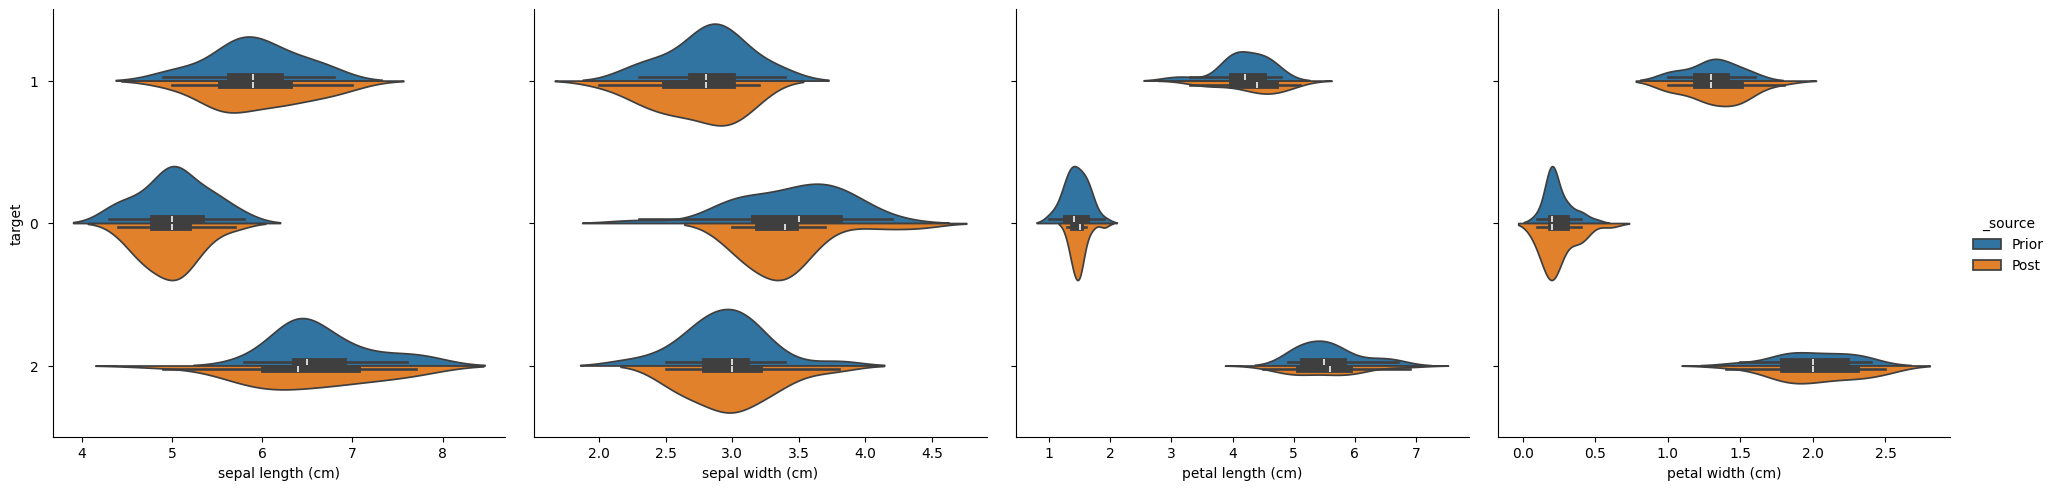

In [8]:
detector.plot_categorical_to_numeric(
    grid_kws={'height': 5},
    plot_kws={'scale': 'area'}
)

As well as categorical columns.

Plotting the following categorical column(s): ['target']
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


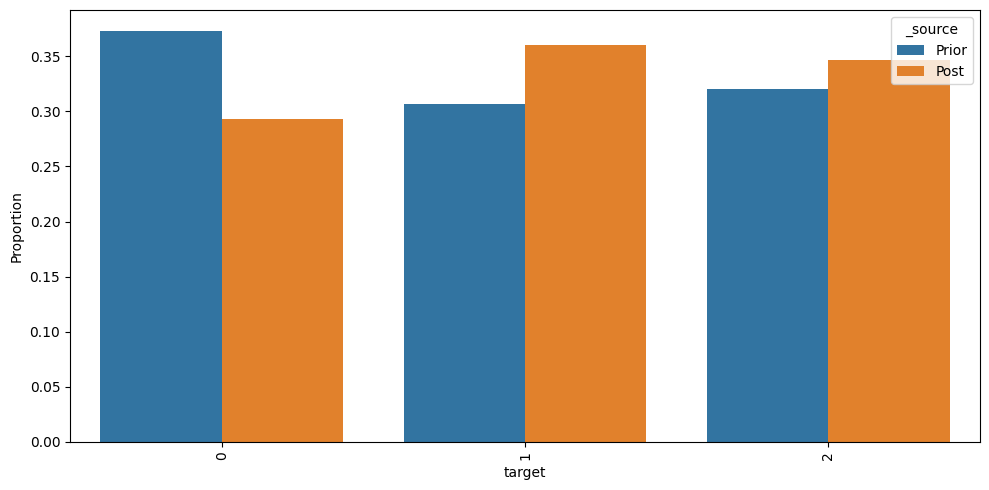

In [9]:
detector.plot_categorical()

Finally, you may compare the ML efficacy of the 2 datasets on a particular column

In [10]:
detector.compare_ml_efficacy(target_column='target')

No test data was provided. Test data will be created with a 70.0-30.0 shuffle split from the post data set.


accuracy  precision    recall  f1_score  \
Class             Data Type                                            
target_0          Prior      1.000000   1.000000  1.000000  1.000000   
                  Post       1.000000   1.000000  1.000000  1.000000   
target_1          Prior      0.956522   1.000000  0.833333  0.909091   
                  Post       0.956522   1.000000  0.833333  0.909091   
target_2          Prior      0.956522   0.888889  1.000000  0.941176   
                  Post       0.956522   0.888889  1.000000  0.941176   
_MICRO_AVERAGE    Prior      0.956522   0.956522  0.956522  0.956522   
                  Post       0.956522   0.956522  0.956522  0.956522   
_MACRO_AVERAGE    Prior      0.971014   0.962963  0.944444  0.950089   
                  Post       0.971014   0.962963  0.944444  0.950089   
_WEIGHTED_AVERAGE Prior      0.973535   0.961353  0.956522  0.955824   
                  Post       0.973535   0.961353  0.956522  0.955824   

                             roc_auc_score    TN   FP   FN    TP   N  
Class             Data Type                                           
target_0          Prior           1.000000  14.0  0.0  0.0   9.0   9  
                  Post            1.000000  14.0  0.0  0.0   9.0   9  
target_1          Prior           0.916667  17.0  0.0  1.0   5.0   6  
                  Post            0.916667  17.0  0.0  1.0   5.0   6  
target_2          Prior           0.966667  14.0  1.0  0.0   8.0   8  
                  Post            0.966667  14.0  1.0  0.0   8.0   8  
_MICRO_AVERAGE    Prior           0.967391  45.0  1.0  1.0  22.0  23  
                  Post            0.967391  45.0  1.0  1.0  22.0  23  
_MACRO_AVERAGE    Prior           0.961111  45.0  1.0  1.0  22.0  23  
                  Post            0.961111  45.0  1.0  1.0  22.0  23  
_WEIGHTED_AVERAGE Prior           0.966667  45.0  1.0  1.0  22.0  23  
                  Post            0.966667  45.0  1.0  1.0  22.0  23

If the model trained with the prior dataset performed worse than that of the post data set, may suggest that an existing model (if any) built with the prior dataset is not performing well on the post data set, and that it may improve from some re-training. In the case, the performance metrics of the prior and the post model are the same.